## Tipos de Correlación

Correlación Directa: Si una variable aumenta, la otra también. Si la variable disminuye, la otra también. Lo hace de manera proporcional.

Correlación Inversa: Si una variable aumenta, la otra disminuye. Si la variable disminuye, la otra aumenta. Lo hace de manera proporcional.

Correlación Nula: No hay un comportamiento claro en cómo afecta una variable a la otra.

## Niveles de correlación:

Correlación Nula: No existe una linea clara entre los puntos del gráfico.

Correlación Fuerte: Los puntos están muy cerca a la línea del gráfico.

Correlación Débil: los puntos siguen la línea del gráfico, pero de lejos.

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import cm as cm
import math as mt
from math import sqrt as sqrt
from math import pow as pow
import seaborn as sns
import matplotlib.pyplot as plt

## Ejemplo de clase

In [2]:
data=pd.DataFrame({'X':[3,4,5,6],'Y':[4,3,2,1]})
data

,X,Y
0,3,4
1,4,3
2,5,2
3,6,1


Imprimimos los puntos de X y Y

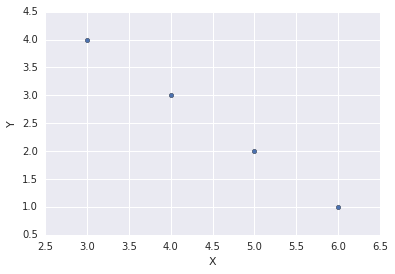

In [3]:
data.plot.scatter(x='X', y='Y')

Obtenemos la tabla con los cuadrados y multiplicaciones

In [4]:
data2=data*data
dataxy=data['X']*data['Y']
table=pd.concat([data,data2,dataxy],axis=1)
table.columns=['xi','yi','xi2','yi2','xi*yi']
table

,xi,yi,xi2,yi2,xi*yi
0,3,4,9,16,12
1,4,3,16,9,12
2,5,2,25,4,10
3,6,1,36,1,6


Obtenemos la sumatoria de cada columna:

In [5]:
zigma=table.sum()
zigma

xi       18
yi       10
xi2      86
yi2      30
xi*yi    40
dtype: int64

Obtenemos la correlación:

In [6]:
n=table.shape[0]
xmean=table['xi'].mean()
ymean=table['yi'].mean()
rxy=(zigma['xi*yi']/n-xmean*ymean)/(sqrt(zigma['xi2']/n-pow(xmean,2))*sqrt(zigma['yi2']/n-pow(ymean,2)))
rxy

-0.9999999999999998

### O podemos usar el siguiente comando:

In [7]:
data.corr()

,X,Y
X,1.0,-1.0
Y,-1.0,1.0


## Ejemplo calificaciones Matemáticas/Física

Queremos saber la relación que existe entre las calificaciones de los alumnos en física y mátematicas.

In [8]:
cali = pd.read_csv('./vol/calificacoines_mate_fisica.csv') #Leemos las calificaciones

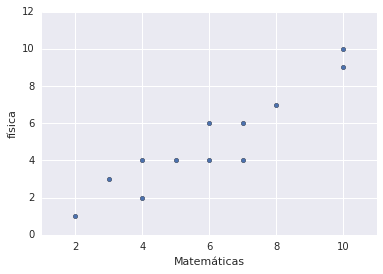

In [9]:
cali.plot.scatter(x='Matemáticas', y='física') #Graficamos las calificaciones de física en relación de las de mate

Ahora, calculamos la covarianza de ambas en relación de una con otra y de sí mismas

In [10]:
cali.cov()

,Matemáticas,física
Matemáticas,6.545455,6.454545
física,6.454545,7.272727


Calculamos la correlación de las mismas

In [11]:
cali.corr()

,Matemáticas,física
Matemáticas,1.000000,0.935507
física,0.935507,1.000000


Con esto llegamos a la conclusión de que hay una correlación muy fuerte entre las calificaciones de matemáticas y las de física en los alumnos

## Ejemplo con datos físicos de los abulones

Importamos los datos desde la base de datos de ics y obtenemos sólo una sub-muestra de 15 especimenes

In [12]:
f = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
df = pd.read_csv(f)
df.columns=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
df=df[0:15]
df

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
7,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
8,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19
9,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14


Graficamos las caracteristicas con respecto a las otras para ver visualmente si existe alguna correlación fuerte y también podemos ver sus histogramas

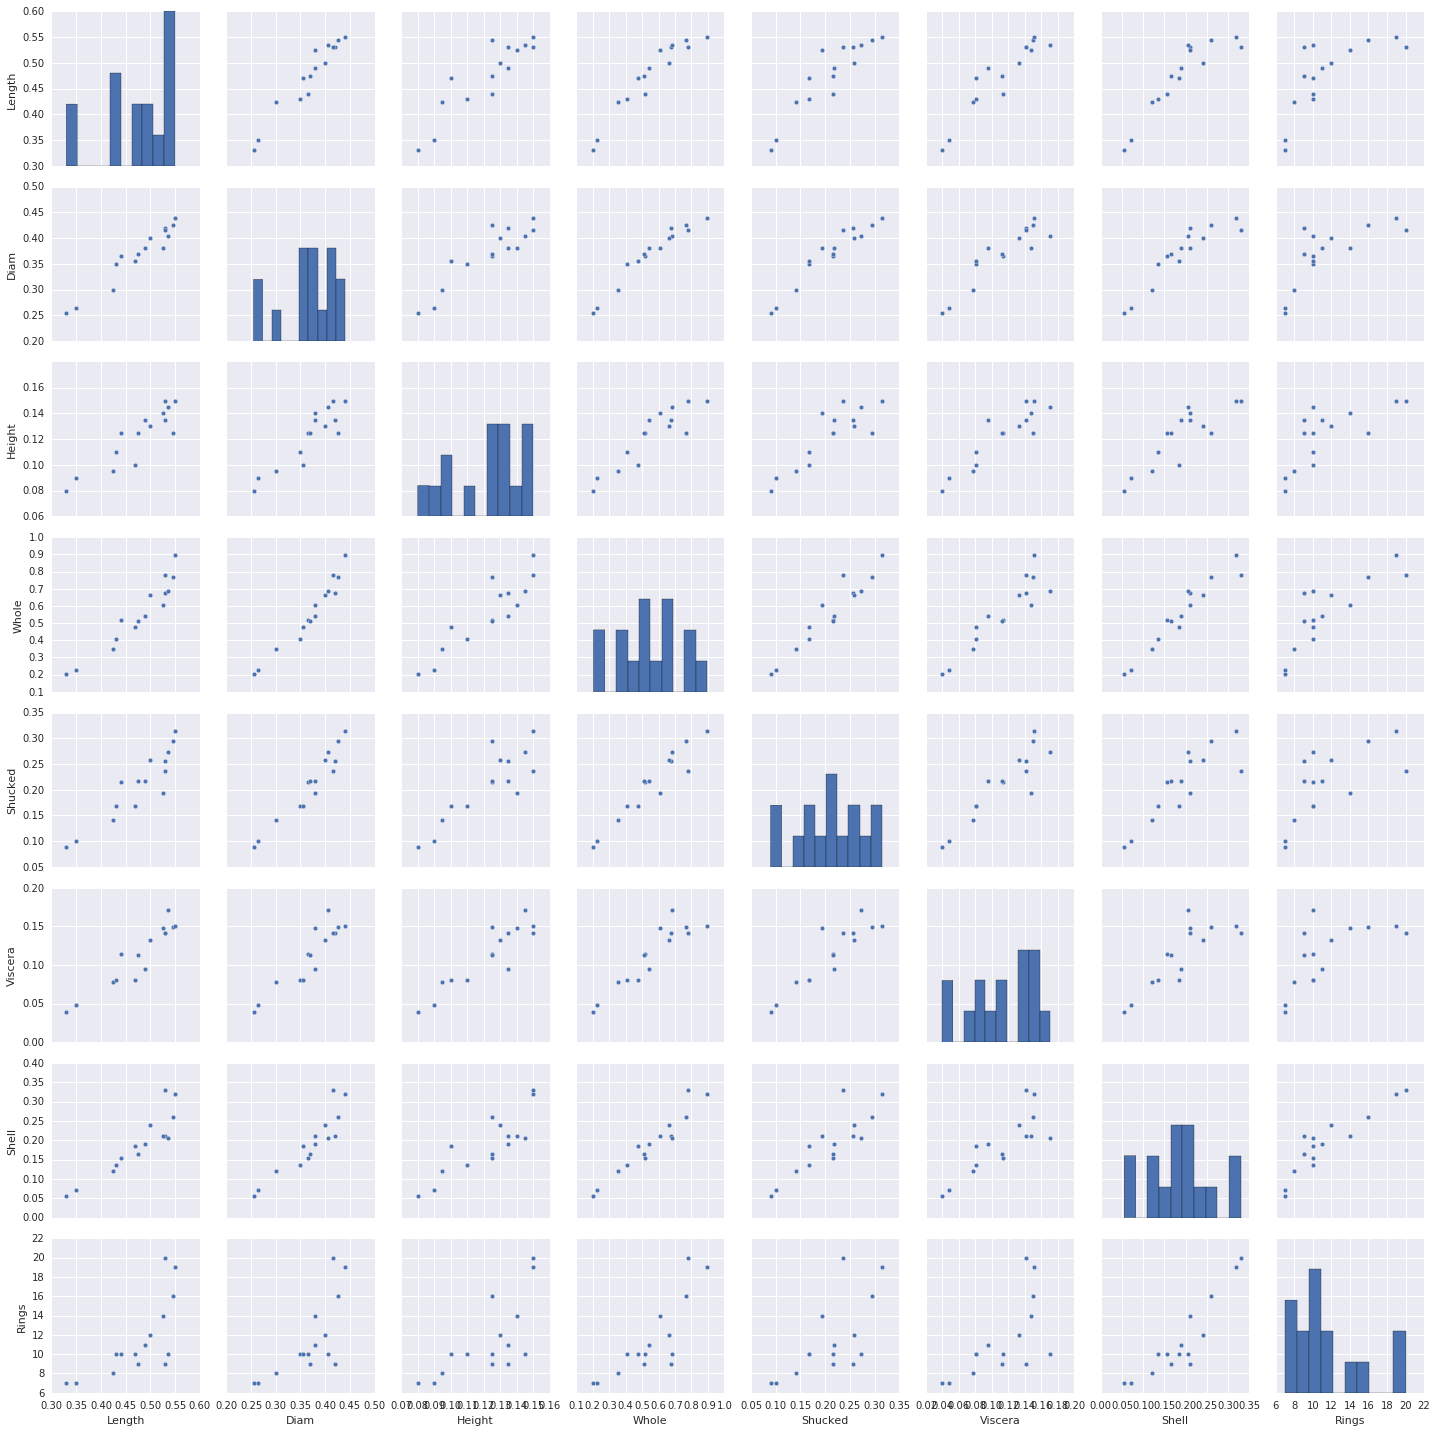

In [13]:
sns.pairplot(df)

Ahora graficaremos de manera visual la correlación existente entre las distintas características físicas del abulon

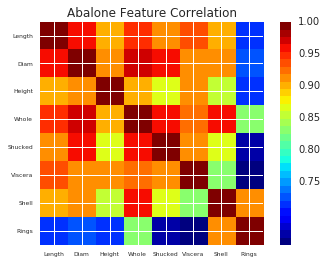

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
ax1.grid(True)
plt.title('Abalone Feature Correlation')
labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
ax1.set_xticklabels(labels,fontsize=6)
ax1.set_yticklabels(labels,fontsize=6)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

Podemos observar varias correlaciones más marcadas en la gráfica anterior, por ejemplo entre: Whole y Diam